In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import bengalese_finch
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [24]:
# load data
rate, data = bengalese_finch()
# filter data
data = butter_bandpass_filter(data, 500, 10000, rate, order=2)

In [25]:
data = data[190000:320000]

In [26]:
figsize = (20,6)

(0.0, 130000.0, -0.7049725112492955, 0.6970851278595155)

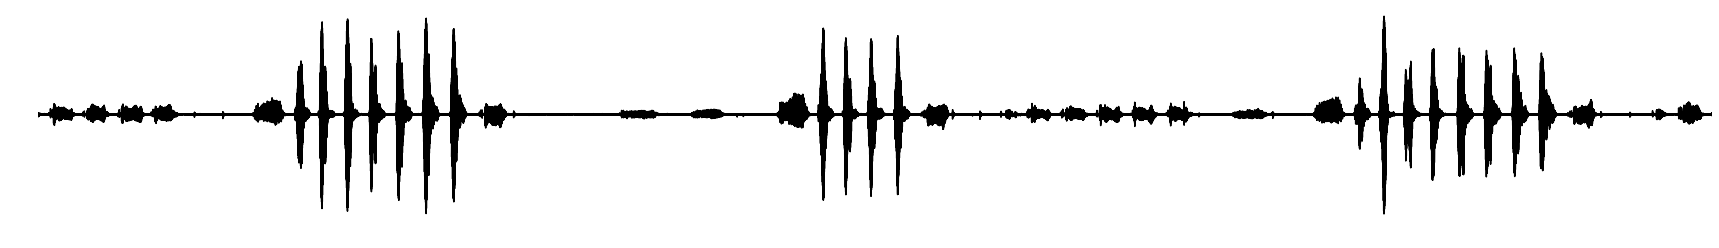

In [52]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data, color='k')
ax.set_xlim([0, len(data)])
ax.axis('off')

In [28]:
### parameters
n_fft=1024
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-70
silence_threshold = 0.005
min_silence_for_spec= 0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.1
spectral_range = [500, 10000]
mask_thresh_std = 1.0
neighborhood_thresh=0.25
max_element_len_ms=250
neighborhood_time_ms=8
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.25
min_element_size_ms_hz = [100, 500]

In [29]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(513, 4063)

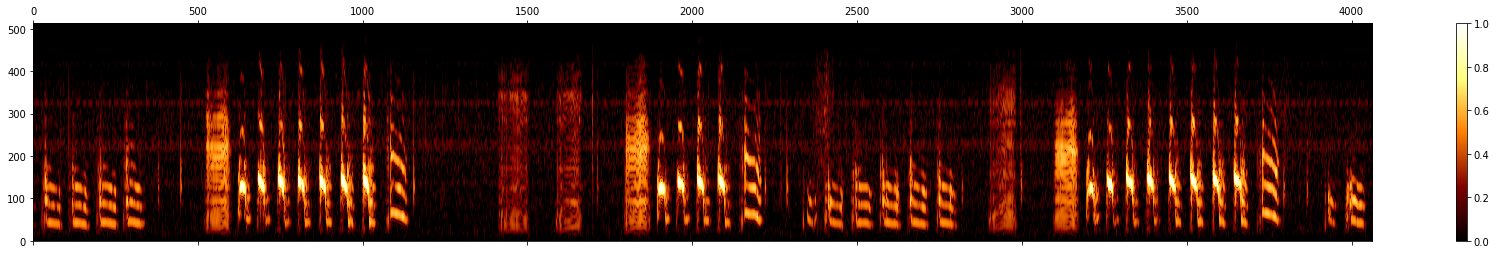

In [35]:
figsize = (30,4)
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation 

In [36]:
from vocalseg.continuity_filtering import continuity_segmentation

In [37]:
??continuity_segmentation

longest silence 0.010000000000000009
longest vocalization 0.12700000000000022
Current min_level_db: -70
longest silence 0.01200000000000001
longest vocalization 0.12199999999999989
Current min_level_db: -65
longest silence 0.049000000000000155
longest vocalization 0.11299999999999999
Current min_level_db: -60
longest silence 0.22299999999999986
longest vocalization 0.08699999999999997


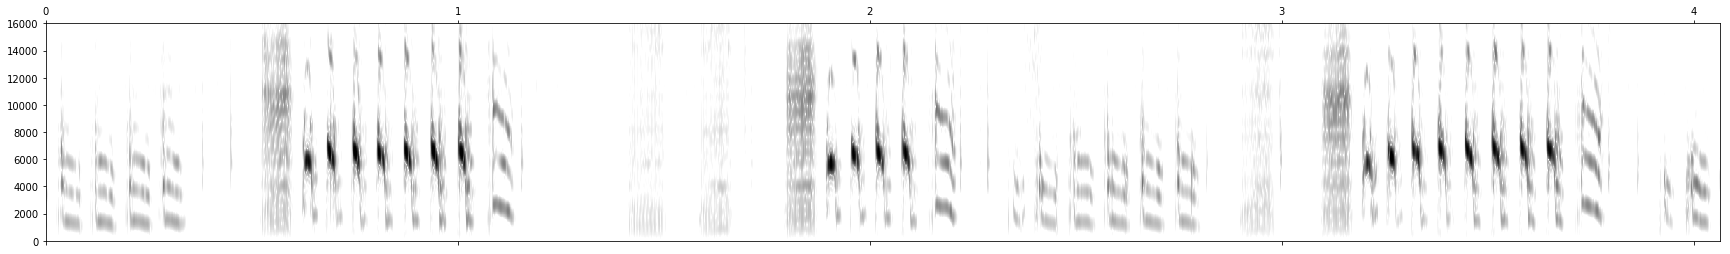

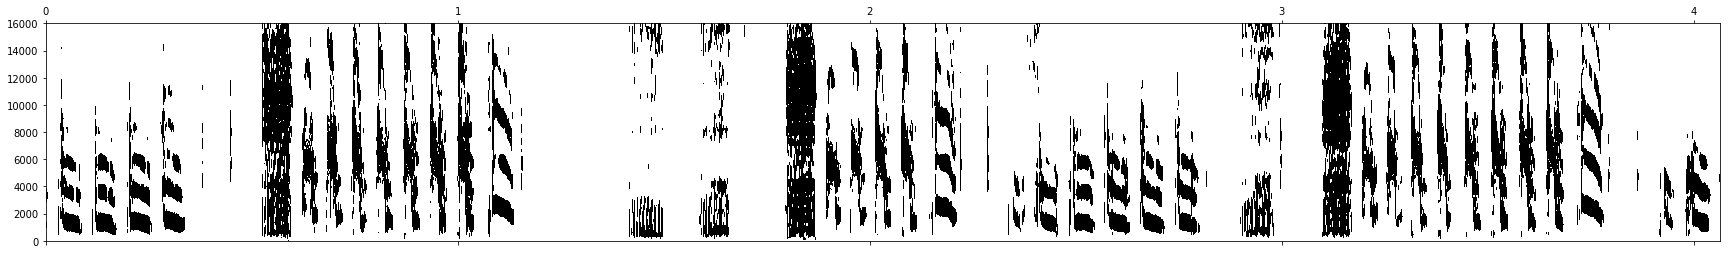

(64, 8)


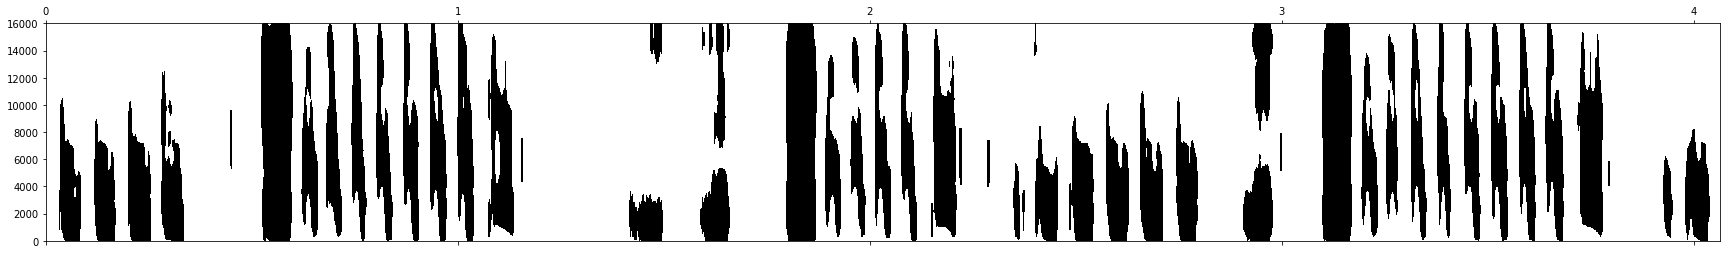

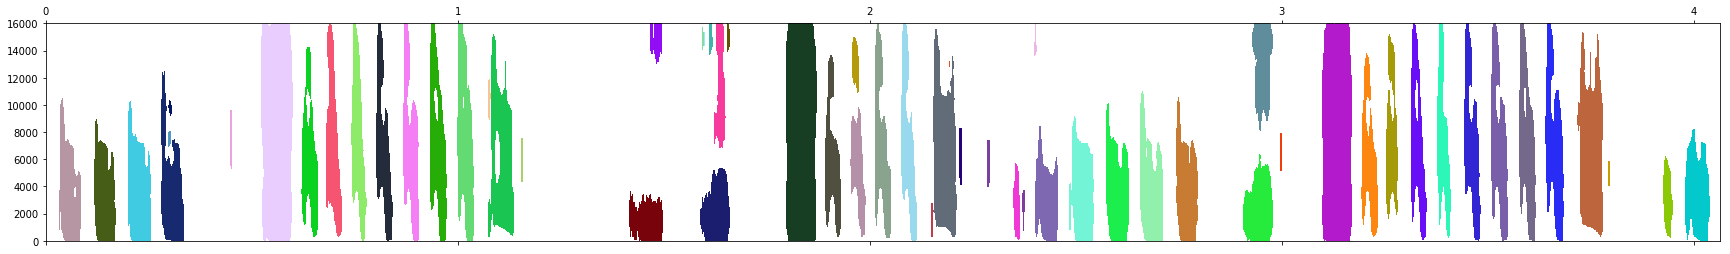

unique elements: 63


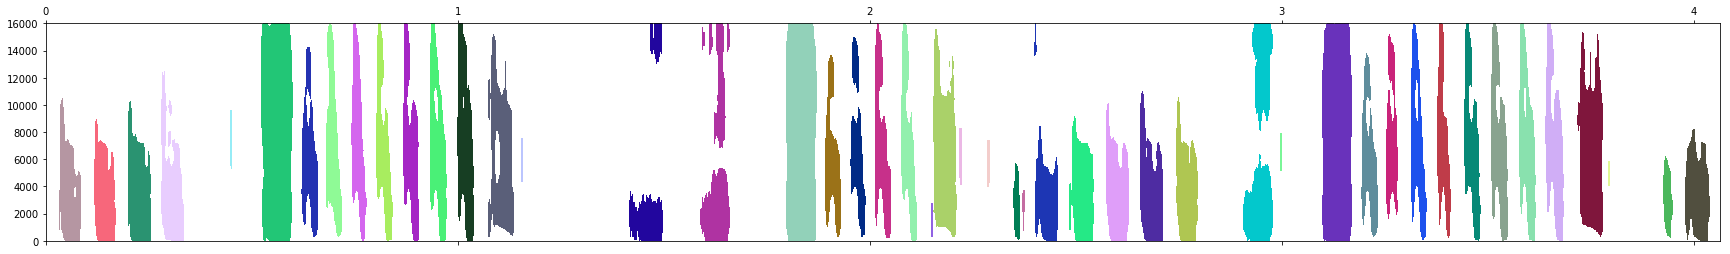

unique elements: 48
1600


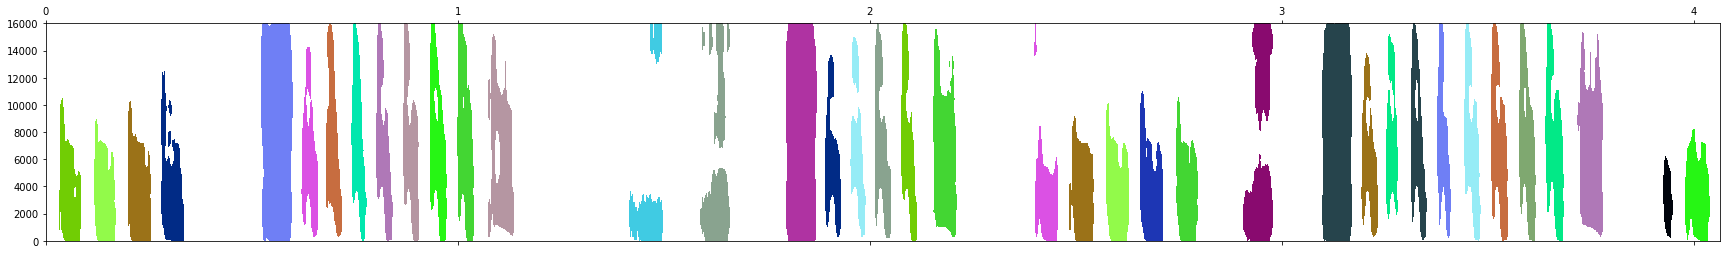

unique elements: 22
-55


In [38]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    silence_threshold = silence_threshold,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    min_silence_for_spec=min_silence_for_spec,
    neighborhood_thresh=neighborhood_thresh,
    min_syllable_length_s=min_syllable_length_s,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= temporal_neighbor_merge_distance_ms,
    overlapping_element_merge_thresh= overlapping_element_merge_thresh,
    min_element_size_ms_hz = min_element_size_ms_hz,
    
)
print(results['min_level_db'])

In [39]:
from vocalseg.continuity_filtering import plot_labelled_elements

In [41]:
??plot_labelled_elements

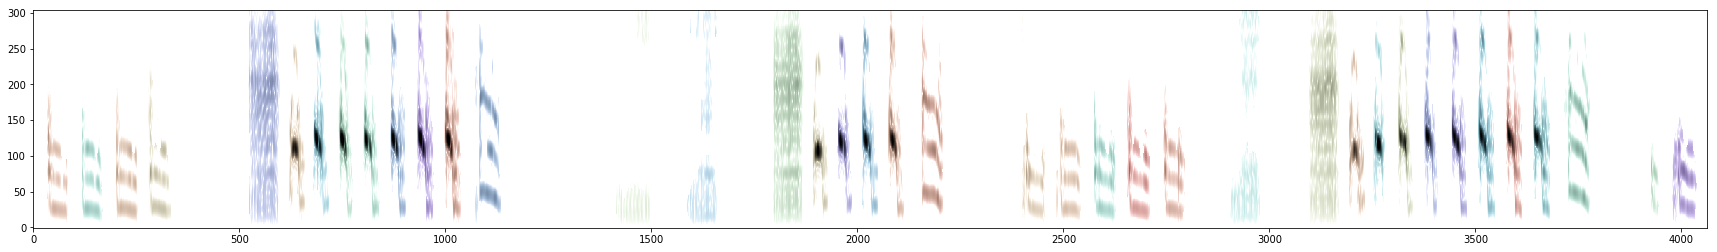

In [40]:
labelled_spec = plot_labelled_elements(results['elements'], results['spec'], figsize=figsize);

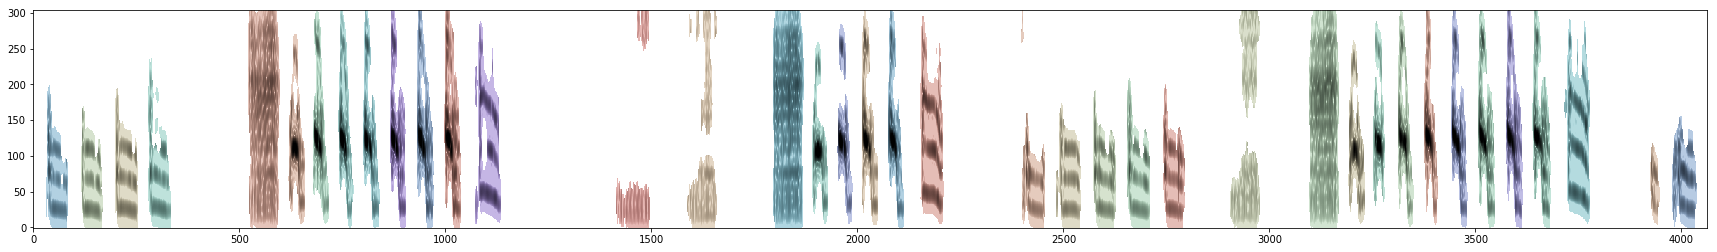

In [49]:
labelled_spec = plot_labelled_elements(results['elements'], np.sqrt(results['spec']+1e-1), figsize=figsize);

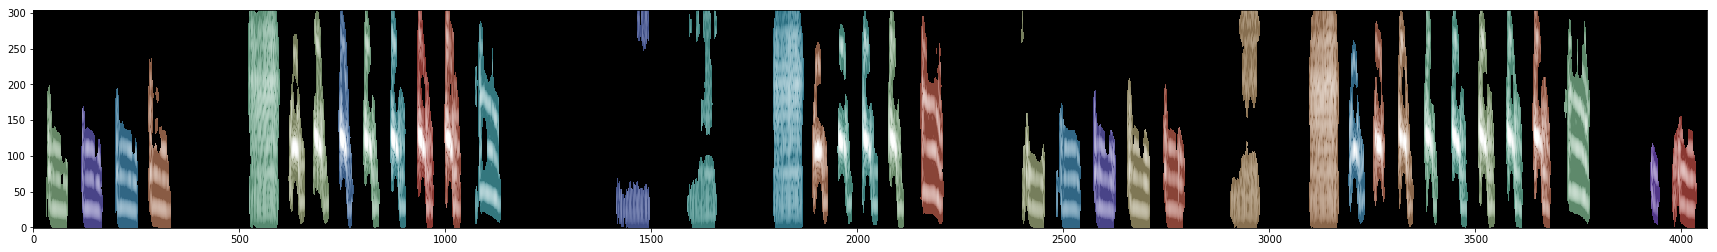

In [47]:
labelled_spec = plot_labelled_elements(results['elements'], np.sqrt(results['spec']+1e-1), figsize=figsize, background ='black');

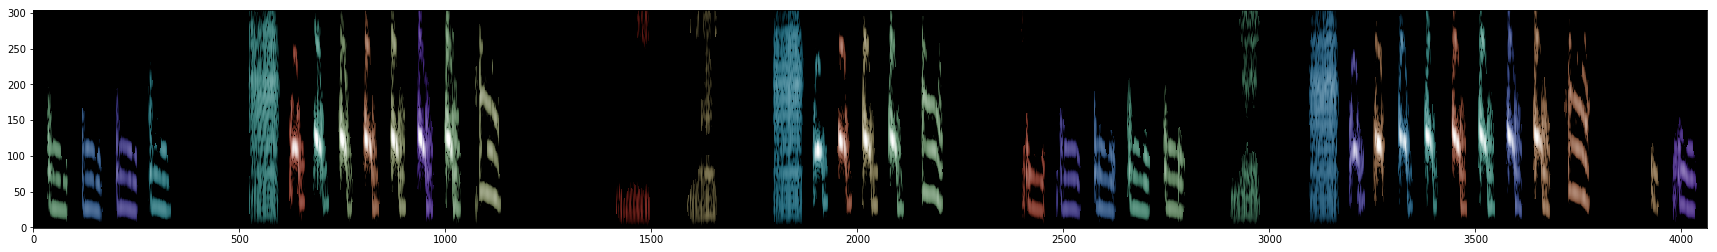

In [48]:
labelled_spec = plot_labelled_elements(results['elements'],results['spec'], figsize=figsize, background ='black');